In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src.visualizer import draw_graph_with_shortest_path


# NetworkX のグラフとして取得

top = 35.67960
bottom = 35.656607
left = 139.47887
right = 139.539762
G = ox.graph_from_bbox((left, bottom, right, top), network_type="bike")

# --- これで G は networkx の MultiDiGraph です ---

# グラフの情報を確認
print(type(G))
# <class 'networkx.classes.multidigraph.MultiDiGraph'>

print(f"ノード数: {len(G.nodes)}")
print(f"エッジ数: {len(G.edges)}")


<class 'networkx.classes.multidigraph.MultiDiGraph'>
ノード数: 3884
エッジ数: 10187


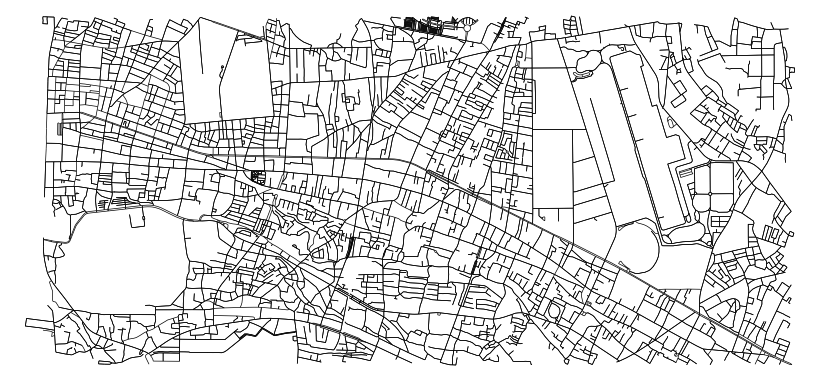

In [ ]:
fig, ax = ox.plot_graph(
    G,
    node_size=0,
    edge_linewidth=0.5,
    edge_color="black",
    bgcolor="#FFFFFF",
    save=True,
    filepath="data/D2_road.svg",
)

In [3]:
df_nodes, df_edges = ox.graph_to_gdfs(G)

In [4]:
road = nx.Graph()
for node, attr in G.nodes(data=True):
    road.add_node(node, coordinate=np.array([attr["x"], attr["y"]]))

for e1, e2, _ in G.edges:
    attr = df_edges.loc[(e1, e2, _)]
    is_koushu = np.inf if attr.name == "甲州街道" else 1.0
    road.add_edge(e1, e2, weight=attr.length * is_koushu)

In [5]:
source_node = 1636628761
target_node = 196957475

In [11]:
df_edges["length"].max()

np.float64(1988.9969350568297)

In [15]:
df_nodes["x"].isna().sum()

np.int64(0)

In [34]:
import pandas as pd
pd.DataFrame(G.degree)[1].min()

np.int64(1)

In [ ]:
'1270306578_308226702'

In [48]:
road.degree[1270306578]

1

In [49]:
from itertools import combinations

In [54]:
list(combinations([1,3,4,5],1))

[(1,), (3,), (4,), (5,)]

In [59]:
list(road.edges([node]))[0]

(13260716915, 13260716913)

In [61]:
road.degree[node]

1

In [70]:
df_edges.loc[(196115717,884458183,0)]["name"]

'甲州街道'